# Lab 1

Долгих Елизавета\
Start - 6 October 2025.\
Deadline - 21 October 2025, 09:30.

*All solutions must be in a <ins>single Colab Jupyter Notebook file</ins> and uploaded to the <ins>LMS portal</ins> as the link to __your__ completed notebook in Colab.*

In [ ]:
import unittest

import numpy
import pandas
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import lognorm, norm
import statsmodels.api as sm
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
from datetime import date, timedelta
from typing import List, Tuple
from math import exp, log, sqrt
import os
import io

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL.csv


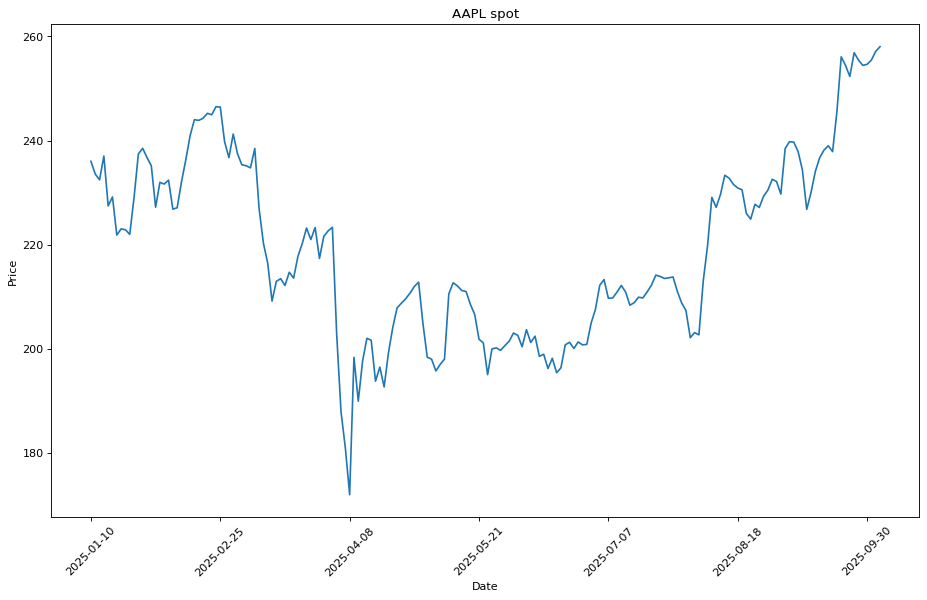

In [ ]:
underlying = "AAPL"

#indexValues = pandas.read_csv('AAPL.csv')
#indexDates = indexValues['Date'].to_list()
#quotes = indexValues["underlyingPrice"]

indexValues = pandas.read_csv(io.StringIO(uploaded['AAPL.csv'].decode('utf-8')))
indexDates = indexValues['Date'].to_list()
#  indexValues = indexValues.set_index("Date", drop=True)
quotes = indexValues["underlyingPrice"]

figure(figsize=(14, 8), dpi=80)

plt.plot(indexValues["underlyingPrice"])
plt.title(f"{underlying} spot")
plt.xlabel("Date")
plt.ylabel("Price")


step = 30
positions = range(0, len(indexDates), step)
labels = [indexDates[i] for i in positions]

plt.xticks(ticks=positions, labels=labels, rotation=45)
plt.show()

## Task 1: Pricing - 1 point

1. Implement the valuation of a call option using the Black-Scholes-Merton formula. Consider the interest rate is constant.

In [ ]:
def PVCallBS(
    spotPrices: numpy.array,
    strike: float,
    maturity: float,
    rate: float,
    volatility: float
) -> numpy.array:
    """
    Calculate the Black-Scholes price of a European call option

    Parameters:
    spotPrices: array of underlying spot prices
    strike: strike price
    maturity: time to maturity in years
    rate: risk-free interest rate
    volatility: volatility of the underlying

    Returns:
    array of call option prices
    """

    S = numpy.array(spotPrices)

    if maturity <= 0:
        call_prices = numpy.maximum(S - strike, 0.0)

    else:
        sqrtT = numpy.sqrt(maturity)
        d1 = (numpy.log(S / strike) + (rate + 0.5 * volatility**2) * maturity) / (volatility * sqrtT)
        d2 = d1 - volatility * sqrtT

        call_prices = S * norm.cdf(d1) - strike * numpy.exp(-rate * maturity) * norm.cdf(d2)

    return call_prices

2. Implement the valuation of a Greeks (Delta, Gamma, Vega, Volga, Vanna) for the call option within the Black-Scholes-Merton model.

In [ ]:
def DeltaCallBS(
    spotPrices: numpy.array,
    strike: float,
    maturity: float,
    riskFreeRate: float,
    volatility: float
) -> numpy.array:

    """
    Input parameters:
    spotPrices - array of spot prices
    strike - option strike
    maturity - option maturity
    riskFreeRate - current risk free rate
    volatility - implied BS volatility

    Returns:
    numpy.array of option deltas
    """
    S = numpy.array(spotPrices)

    if maturity <= 0:
        deltas = numpy.where(S > strike, 1.0, 0.0)
    else:
        sqrtT = numpy.sqrt(maturity)
        d1 = (numpy.log(S / strike) + (riskFreeRate + 0.5 * volatility**2) * maturity) / (volatility * sqrtT)
        deltas = norm.cdf(d1)

    return deltas


In [ ]:
def GammaCallBS(
    spotPrices: numpy.array,
    strike: float,
    maturity: float,
    riskFreeRate: float,
    volatility: float
) -> numpy.array:

    """
    Input parameters:
    spotPrices - array of spot prices
    strike - option strike
    maturity - option maturity
    riskFreeRate - current risk free rate
    volatility - implied BS volatility

    Returns:
    numpy.array of option gammas
    """
    if maturity <= 0:
        return numpy.zeros_like(spotPrices)

    sqrtT = numpy.sqrt(maturity)
    d1 = (numpy.log(spotPrices / strike) + (riskFreeRate + 0.5 * volatility**2) * maturity) / (volatility * sqrtT)
    gamma = norm.pdf(d1) / (spotPrices * volatility * sqrtT)

    return gamma


In [ ]:
def VegaCallBS(
    spotPrices: numpy.array,
    strike: float,
    maturity: float,
    riskFreeRate: float,
    volatility: float
) -> numpy.array:

    """
    Input parameters:
    spotPrices - array of spot prices
    strike - option strike
    maturity - option maturity
    riskFreeRate - current risk free rate
    volatility - implied BS volatility

    Returns:
    numpy.array of option vegas
    """
    if maturity <= 0:
        return numpy.zeros_like(spotPrices)
    sqrtT = numpy.sqrt(maturity)
    d1 = (numpy.log(spotPrices / strike) + (riskFreeRate + 0.5 * volatility**2) * maturity) / (volatility * sqrtT)
    vega = spotPrices * norm.pdf(d1) * sqrtT

    return vega

In [ ]:
def VolgaCallBS(
    spotPrices: numpy.array,
    strike: float,
    maturity: float,
    riskFreeRate: float,
    volatility: float
) -> numpy.array:

    """
    Input parameters:
    spotPrices - array of spot prices
    strike - option strike
    maturity - option maturity
    riskFreeRate - current risk free rate
    volatility - implied BS volatility

    Returns:
    numpy.array of option volgas
    """

    if maturity <= 0:
        return numpy.zeros_like(spotPrices)

    sqrtT = numpy.sqrt(maturity)
    d1 = (numpy.log(spotPrices / strike) + (riskFreeRate + 0.5 * volatility**2) * maturity) / (volatility * sqrtT)
    d2 = d1 - volatility * sqrtT
    volga = spotPrices * norm.pdf(d1) * sqrtT * (d1 * d2) / volatility

    return volga


In [ ]:
def VannaCallBS(
    spotPrices: numpy.array,
    strike: float,
    maturity: float,
    riskFreeRate: float,
    volatility: float
) -> numpy.array:

    """
    Input parameters:
    spotPrices - array of spot prices
    strike - option strike
    maturity - option maturity
    riskFreeRate - current risk free rate
    volatility - implied BS volatility

    Returns:
    numpy.array of option vannas
    """

    if maturity <= 0:
        return numpy.zeros_like(spotPrices)

    sqrtT = numpy.sqrt(maturity)
    d1 = (numpy.log(spotPrices / strike) + (riskFreeRate + 0.5 * volatility**2) * maturity) / (volatility * sqrtT)
    d2 = d1 - volatility * sqrtT
    vanna = -norm.pdf(d1) * d2 / volatility

    return vanna


3. Ensure the following unit tests pass.

In [ ]:
class TestPVCallBS(unittest.TestCase):
    def testZeroStrike(self):
        self.assertAlmostEqual(
            PVCallBS(
                spotPrices=100,
                strike=0.0001,
                maturity=1.0,
                rate=0.05,
                volatility=0.2
            ),
            100,
            delta=0.0001
        )
    def testRate(self):
        self.assertNotEqual(
            PVCallBS(
                spotPrices=100,
                strike=1,
                maturity=1.0,
                rate=0.1,
                volatility=0.2
            ),
            PVCallBS(
                spotPrices=100,
                strike=1,
                maturity=1.0,
                rate=0.2,
                volatility=0.2
            )
        )
    def testVolatility(self):
        self.assertAlmostEqual(
            PVCallBS(
                spotPrices=100,
                strike=1000,
                maturity=1.0,
                rate=0.1,
                volatility=0.01
            ),
            0,
            delta=0.0001
        )

suite = unittest.TestSuite()
suite.addTest(TestPVCallBS('testZeroStrike'))
suite.addTest(TestPVCallBS('testRate'))
suite.addTest(TestPVCallBS('testVolatility'))

runner = unittest.TextTestRunner(verbosity=2)
runner.run(suite)

testZeroStrike (__main__.TestPVCallBS.testZeroStrike) ... ok
testRate (__main__.TestPVCallBS.testRate) ... ok
testVolatility (__main__.TestPVCallBS.testVolatility) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.008s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

## Task 1: Trading - 2 points

Consider the following scenario.\
We sold a call option on AAPL stock with a strike of 220 and expiration date 2025-10-03.\
The trade start date is 2025-02-10.

In [ ]:
strike = 220
estimation_start = '2025-01-10'
trade_start = '2025-02-10'
expiration_date = '2025-10-03'
rate = 0.05

1. Download the provided data table. Estimate the realized volatility using data from the "underlyingPrice" column from 2025-01-10 until the trade start date.

In [ ]:
def calculate_realized_volatility(prices: pandas.Series) -> float:
    """
     Calculate annualized realized volatility with Act/365 convention
    """

    # по комментариям из чата: "время измеряем в конвенции Act365"
    returns = numpy.log(prices / prices.shift(1)).dropna()
    daily_vol = returns.std(ddof=1)

    k = len(returns) + 1
    trading_period_days = (pandas.to_datetime(trade_start) - pandas.to_datetime(estimation_start)).days
    time_in_years = trading_period_days / 365.0

    if time_in_years > 0 and k > 0:
        annual_vol = daily_vol * numpy.sqrt(k / time_in_years)
    else:
        annual_vol = numpy.nan

    return annual_vol

In [ ]:
data = pandas.read_csv('AAPL.csv')
data['Date'] = pandas.to_datetime(data['Date'])
price_series = pandas.Series(data['underlyingPrice'].values, index=data['Date'])

estimation_data = data[
    (data['Date'] >= estimation_start) &
    (data['Date'] <= trade_start)
]
# по условию был небольшой вопрос - "until" включительно или нет
# если нет - заменить на (indexValues['Date'] < trade_start)
# и тогда Realized volatility: 0.3213

realized_vol = calculate_realized_volatility(estimation_data['underlyingPrice'])
print(f"Realized volatility: {realized_vol:.4f}")

Realized volatility: 0.3206


2. Implement the calculation of the financial result for a self-financing hedging strategy of a portfolio containing AAPL stock and cash. The number of shares in the strategy equals the option's Delta. Use the volatility obtained in the previous step for calculations.

In [ ]:
def hedging_strategy(
    data: pandas.DataFrame,
    strike: float,
    trade_start: str,
    maturity_date: str,
    rate: float,
    volatility: float
) -> pandas.DataFrame:
    """
    Implement delta hedging strategy
    """
    # Filter trading period data
    trading_data = data[data['Date'] >= trade_start].copy()
    trading_data = trading_data.reset_index(drop=True)

    # Convert dates to datetime and calculate time to maturity
    trading_data['Date'] = pandas.to_datetime(trading_data['Date'])
    maturity_dt = pandas.to_datetime(maturity_date)

    trading_data['DaysToMaturity'] = (maturity_dt - trading_data['Date']).dt.days
    trading_data['TimeToMaturity'] = trading_data['DaysToMaturity'] / 365.0

    # Initialize portfolio
    trading_data['Delta'] = 0.0
    trading_data['OptionPrice'] = 0.0
    trading_data['CashPosition'] = 0.0
    trading_data['DailyPNL'] = 0.0
    trading_data['CumPNL'] = 0.0
    trading_data['HedgeValue'] = 0.0
    trading_data['HedgingError'] = 0.0


    # Initial conditions
    initial_spot = trading_data.iloc[0]['underlyingPrice']
    initial_time = trading_data.iloc[0]['TimeToMaturity']

    # Calculate initial option price and delta
    # то есть мы продаем опцион за initial_option_price
    # и покупаем initial_delta акций по цене initial_spot
    # оставшиеся деньги кладем на счет: initial_cash

    initial_option_price = PVCallBS(initial_spot, strike, initial_time, rate, volatility)
    initial_delta = DeltaCallBS(initial_spot, strike, initial_time, rate, volatility)

    # We sold the option, so we receive premium
    initial_cash = initial_option_price - initial_delta * initial_spot

    trading_data.loc[0, 'Delta'] = initial_delta
    trading_data.loc[0, 'OptionPrice'] = initial_option_price
    trading_data.loc[0, 'CashPosition'] = initial_cash
    trading_data.loc[0, 'DailyPNL'] = 0.0
    trading_data.loc[0, 'CumPNL'] = 0.0
    trading_data.loc[0, 'HedgeValue'] = 0.0
    trading_data.loc[0, 'HedgingError'] = 0.0

    for i in range(1, len(trading_data)):
        trading_data.loc[i, 'OptionPrice'] = PVCallBS(
            trading_data.loc[i, 'underlyingPrice'],
            strike,
            trading_data.loc[i, 'TimeToMaturity'],
            rate, volatility)

        trading_data.loc[i, 'Delta'] = DeltaCallBS(
            trading_data.loc[i, 'underlyingPrice'],
            strike,
            trading_data.loc[i, 'TimeToMaturity'],
            rate, volatility)


    # Dynamic hedging
    for i in range(1, len(trading_data)):

        S_prev = trading_data.loc[i-1, 'underlyingPrice']
        delta_prev = trading_data.loc[i-1, 'Delta']
        cash_prev = trading_data.loc[i-1, 'CashPosition']
        option_price_prev = trading_data.loc[i-1, 'OptionPrice']

        S_curr = trading_data.loc[i, 'underlyingPrice']
        option_price_curr = trading_data.loc[i, 'OptionPrice']

        cash_interest = cash_prev * (numpy.exp(rate / 365) -1)
        stock_pnl = (S_curr - S_prev) * delta_prev
        option_pnl = option_price_prev - option_price_curr

        daily_pnl = cash_interest +  stock_pnl + option_pnl

        delta_curr = trading_data.loc[i, 'Delta']
        cash_delta = -(delta_curr - delta_prev) * S_curr

        trading_data.loc[i, 'CashPosition'] = cash_prev + cash_interest + cash_delta
        trading_data.loc[i, 'DailyPNL'] = daily_pnl
        trading_data.loc[i, 'CumPNL'] = trading_data.loc[i-1, 'CumPNL'] + daily_pnl
        trading_data.loc[i, 'HedgeValue'] = delta_curr * S_curr + trading_data.loc[i, 'CashPosition']
        trading_data.loc[i, 'HedgingError'] = trading_data.loc[i, 'HedgeValue'] - trading_data.loc[i, 'OptionPrice']

    return trading_data

hedging_results = hedging_strategy(
    data, strike, trade_start, expiration_date, rate, realized_vol
)

In [ ]:
hedging_results

,Unnamed: 0,Date,impliedVolatility,instantaneousVolatility,underlyingPrice,DaysToMaturity,TimeToMaturity,Delta,OptionPrice,CashPosition,DailyPNL,CumPNL,HedgeValue,HedgingError
0,20,2025-02-10,0.309404,0.299747,227.094116,235,0.643836,0.646960,30.243492,-116.677235,0.000000,0.000000,0.000000,0.000000
1,21,2025-02-11,0.319000,0.320219,232.052002,234,0.641096,0.677591,33.465220,-123.801398,-0.030161,-0.030161,33.435060,-0.030161
2,22,2025-02-12,0.302417,0.321174,236.291611,233,0.638356,0.702483,36.328431,-129.699922,-0.007448,-0.037608,36.290822,-0.037608
3,23,2025-02-13,0.324484,0.325649,240.940247,232,0.635616,0.728349,39.592007,-135.949951,-0.015759,-0.053367,39.538640,-0.053367
4,24,2025-02-14,0.317148,0.311373,244.002747,231,0.632877,0.744593,41.785057,-139.932132,0.018894,-0.034473,41.750584,-0.034473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,179,2025-09-29,0.433302,0.285296,254.429993,4,0.010959,0.999994,34.550519,-220.226023,0.061470,-0.348167,34.202352,-0.348167
160,180,2025-09-30,0.492158,0.273456,254.630005,3,0.008219,1.000000,34.720398,-220.257757,-0.000038,-0.348204,34.372193,-0.348204
161,181,2025-10-01,0.484658,0.267196,255.449997,2,0.005479,1.000000,35.510263,-220.287986,-0.000048,-0.348252,35.162011,-0.348252
162,182,2025-10-02,0.539552,0.266492,257.130005,1,0.002740,1.000000,37.160140,-220.318165,-0.000048,-0.348299,36.811840,-0.348299


In [ ]:
print("\nHedging results:")
print(f"Initial option price: {hedging_results['OptionPrice'].iloc[0]:.2f}")
print(f"Last option price: {hedging_results['OptionPrice'].iloc[-1]:.2f}")
print(f"Result PNL: {hedging_results['CumPNL'].iloc[-1]:.2f}")
print(f"Average daily PNL: {hedging_results['DailyPNL'].mean():.2f}")
print(f"Maximum daily PNL: {hedging_results['DailyPNL'].max():.2f}")
print(f"Minimum daily PNL: {hedging_results['DailyPNL'].min():.2f}")
print(f"Hedging error: {hedging_results['HedgingError'].iloc[-1]:.2f}")


Hedging results:
Initial option price: 30.24
Last option price: 38.02
Result PNL: -0.35
Average daily PNL: -0.00
Maximum daily PNL: 0.48
Minimum daily PNL: -2.68
Hedging error: -0.35


3. Plot the time evolution of the financial result.

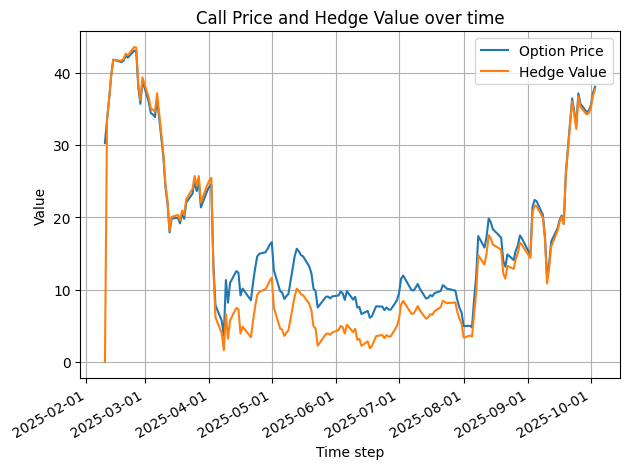

In [ ]:
plt.plot(hedging_results['Date'][:], hedging_results['OptionPrice'], label="Option Price")
plt.plot(hedging_results['Date'][:], hedging_results['HedgeValue'], label="Hedge Value")
plt.title("Call Price and Hedge Value over time")
plt.xlabel("Time step")
plt.ylabel("Value")

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.grid(True)
plt.legend()
plt.show()

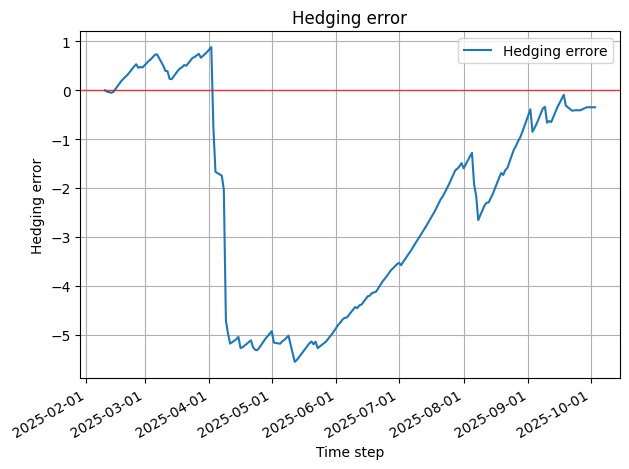

In [ ]:
plt.plot(hedging_results['Date'][:], hedging_results['HedgingError'], label="Hedging errore")
plt.title("Hedging error")
plt.xlabel("Time step")
plt.ylabel("Hedging error")

ax = plt.gca()
ax.axhline(y=0, color='red', linestyle='-', alpha=0.7, linewidth=1)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.grid(True)
plt.legend()
plt.show()

## Task 2: Thinking - 3 points

1. Assume we take constant volatility parameter with value equal 0.5.\
Decompose the hedging error into components. Plot the results.\
Explain sign of each component and factors affecting its size.

Возьмем формулу и код с небольшими изменениями с семинара 4:
#### Hedging error:

$$
    X_t - V(t, S_t) = \underbrace{\frac{X_0 - V(0, S_0)}{D_t}}_{\text{Premium component}} + \underbrace{\frac{1}{D_t} \int_0^t D_u (r_u - r) \left(V(u, S_u) - \frac{\partial V}{\partial s}(u, S_u) S_u \right)du}_{\text{Funding component}}
$$
$$
+ \underbrace{\frac{1}{D_t} \int_0^t \left(\Delta_u - \frac{\partial V}{\partial s}(u, S_u) \right) d(D_u S_u)}_{\text{Delta component}} + \underbrace{\frac{1}{2} \frac{1}{D_t} \int_0^t D_u \frac{\partial^2 V}{\partial s^2}(u, S_u) (\sigma_t^2 S_u^2 du - d[S, S]_u)}_{\text{Gamma component}}
$$
$$
\underbrace{-\frac{1}{D_t} \int_0^t \left(D_u \frac{\partial V}{\partial \sigma} \right) d \sigma_u}_{\text{Vega component}} \underbrace{-\frac{1}{D_t} \int_0^t \left(D_u \frac{\partial^2 V}{\partial s \partial \sigma} \right) d [S, \sigma]_u}_{\text{Vanna component}} \underbrace{-\frac{1}{2} \frac{1}{D_t} \int_0^t \left(D_u \frac{\partial^2 V}{\partial \sigma^2} \right) d [\sigma, \sigma]_u}_{\text{Volga component}}
$$

In [ ]:
def decompose_hedging_error(
    dates: List[date],
    spotPrice: List[float],
    volatilityOption: List[float],
    volatilityPremium: float,
    volatilityHedging: List[float],
    riskFreeRate: float,
    riskFreeRateModel: float,
    maturity: float,
    strike: float
) -> Tuple[numpy.array, float]:

    """
    Input parameters:
    dates: list of backtesting dates,
    spotPrices - index prices,
    volatilityOption - implied volatility list,
    volatilityPremium - initial purchasing implied volatility,
    volatilityHedging - hedging implied volatility,
    riskFreeRate - current risk free rate on the market,
    riskFreeRateModel -- rfr used in BSM model
    maturity - option maturity
    strike - strike

    Returns:
    numpy.array of portfolio PnL and y-axis scale according to the first option price
    """

    pricingDate = dates[0]
    strike = spotPrice[0]
    callPV = []
    deltaHedging = []
    deltaOption = []
    vegaOption = []
    vannaOption = []
    volgaOption = []
    gammaOption = []
    allDf = []

    for i, currentDate in enumerate(dates[:-1]):
        T = (maturity - currentDate).days / 365.
        quotesTable = exp(-riskFreeRate * (currentDate - pricingDate).days / 365.)
        allDf.append(quotesTable)
        callPV.append(PVCallBS(spotPrice[i], strike, T, riskFreeRateModel, volatilityOption[i]))
        deltaHedging.append(DeltaCallBS(spotPrice[i], strike, T, riskFreeRateModel, volatilityHedging[i]))
        deltaOption.append(DeltaCallBS(spotPrice[i], strike, T, riskFreeRateModel, volatilityOption[i]))
        gammaOption.append(GammaCallBS(spotPrice[i], strike, T, riskFreeRateModel, volatilityOption[i]))
        vegaOption.append(VegaCallBS(spotPrice[i], strike, T, riskFreeRateModel, volatilityOption[i]))
        vannaOption.append(VannaCallBS(spotPrice[i], strike, T, riskFreeRateModel, volatilityOption[i]))
        volgaOption.append(VolgaCallBS(spotPrice[i], strike, T, riskFreeRateModel, volatilityOption[i]))

        if currentDate == pricingDate:
            initialHedgeValue = [PVCallBS(spotPrice[i], strike, T, riskFreeRateModel, volatilityPremium)]
            optionValue = [callPV[i]]
            premiumComponent = [initialHedgeValue[0] - optionValue[0]]
            fundingComponent = [0]
            deltaComponent = [0]
            gammaComponent = [0]
            vegaComponent = [0]
            vannaComponent = [0]
            volgaComponent = [0]
        else:

            dt = (currentDate - dates[i - 1]).days / 365.

            prevDf = exp(-riskFreeRate * (dates[i - 1] - pricingDate).days / 365.)
            optionValue.append(callPV[i])
            initialHedgeValue.append(
                initialHedgeValue[i - 1]
                + deltaHedging[i - 1] * (spotPrice[i] - spotPrice[i - 1])
                + riskFreeRate * (initialHedgeValue[i - 1] - deltaHedging[i - 1] * spotPrice[i - 1]) * dt
            )
            premiumComponent.append(premiumComponent[i - 1])
            fundingComponent.append(
                fundingComponent[i - 1]
                + prevDf * (riskFreeRate - riskFreeRateModel)
                * (callPV[i - 1] - deltaOption[i - 1] * spotPrice[i - 1]) * dt
            )
            deltaComponent.append(
                deltaComponent[i - 1]
                + (deltaHedging[i - 1] - deltaOption[i - 1]) * (quotesTable * spotPrice[i] - prevDf * spotPrice[i - 1])
            )
            gammaComponent.append(
                gammaComponent[i - 1]
                + .5 * prevDf * gammaOption[i - 1]
                * (
                    volatilityOption[i - 1] ** 2 * spotPrice[i - 1] ** 2 * dt
                    - (spotPrice[i] - spotPrice[i - 1]) * (spotPrice[i] - spotPrice[i - 1])
                )
            )
            vegaComponent.append(
                vegaComponent[i - 1]
                + prevDf * vegaOption[i - 1] * (volatilityOption[i] - volatilityOption[i - 1])
            )
            vannaComponent.append(
                vannaComponent[i - 1]
                + prevDf * vannaOption[i - 1]
                * (spotPrice[i] - spotPrice[i - 1]) * (volatilityOption[i] - volatilityOption[i - 1])
            )
            volgaComponent.append(
                volgaComponent[i - 1]
                + .5 * prevDf * volgaOption[i - 1] * (volatilityOption[i] - volatilityOption[i - 1]) ** 2
            )

    portfolio = numpy.array(initialHedgeValue) - numpy.array(optionValue) \
        - 1 / numpy.array(allDf) \
        * (
            numpy.array(premiumComponent)
            + numpy.array(fundingComponent)
            + numpy.array(deltaComponent)
            + numpy.array(gammaComponent)
            - numpy.array(vegaComponent)
            - numpy.array(vannaComponent)
            - numpy.array(volgaComponent)
        )

    simulationResults = {
        "dates": dates,
        "hedgingPortfolio": portfolio,
        "hedgingPortfolioError": portfolio - (numpy.array(initialHedgeValue) - numpy.array(optionValue)),
        "initialHedgeValue": numpy.array(initialHedgeValue),
        "optionValue": numpy.array(optionValue),
        "premiumComponent": numpy.array(premiumComponent),
        "fundingComponent": numpy.array(fundingComponent),
        "deltaComponent": numpy.array(deltaComponent),
        "gammaComponent": numpy.array(gammaComponent),
        "vegaComponent": numpy.array(vegaComponent),
        "vannaComponent": numpy.array(vannaComponent),
        "volgaComponent": numpy.array(volgaComponent),
        "discountFactors": numpy.array(allDf)
    }

    return simulationResults

In [ ]:
strike = 220
estimation_start = '2025-01-10'
trade_start = '2025-02-10'
expiration_date = '2025-10-03'
rate = 0.05
const_vol = 0.5

data = indexValues.copy()
data['Date'] = pandas.to_datetime(data['Date'])
start = pandas.to_datetime(trade_start)
expiry = pandas.to_datetime(expiration_date)
data = data[(data['Date'] >= start) & (data['Date'] < expiry)].sort_values('Date').reset_index(drop=True)
dates = data['Date'].tolist()

S = data['underlyingPrice'].astype(float).values
impliedVolatility = data['impliedVolatility'].fillna(data['impliedVolatility'].mean()).tolist()
instantaneousVolatility = data['instantaneousVolatility'].fillna(data['instantaneousVolatility'].mean()).tolist()

In [ ]:
res = decompose_hedging_error(
    dates=dates,
    spotPrice=S,
    volatilityOption=impliedVolatility,
    volatilityPremium=const_vol,
    volatilityHedging=const_vol * numpy.ones(len(dates)),
    riskFreeRate=rate,
    riskFreeRateModel=rate,
    maturity=expiry,
    strike=strike
)

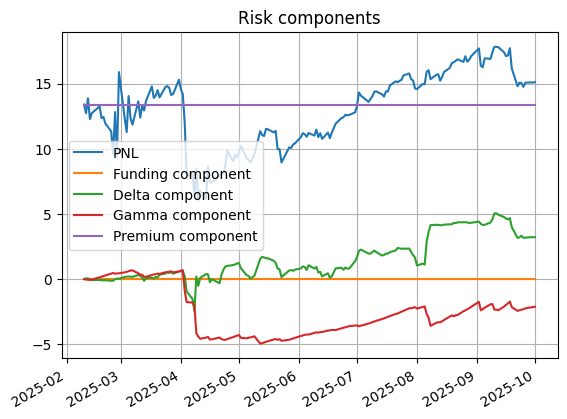

In [ ]:
#графики разбиты на несколько штук для "читабельности"

plt.figure()
plt.plot(res["dates"][:-1], -res["hedgingPortfolioError"], label="PNL")
plt.plot(res["dates"][:-1], res["fundingComponent"], label="Funding component")
plt.plot(res["dates"][:-1], res["deltaComponent"], label="Delta component")
plt.plot(res["dates"][:-1], res["gammaComponent"], label="Gamma component")
plt.plot(res["dates"][:-1], res["premiumComponent"], label="Premium component")
plt.gcf().autofmt_xdate()
plt.title("Risk components")
plt.grid(True)
plt.legend()

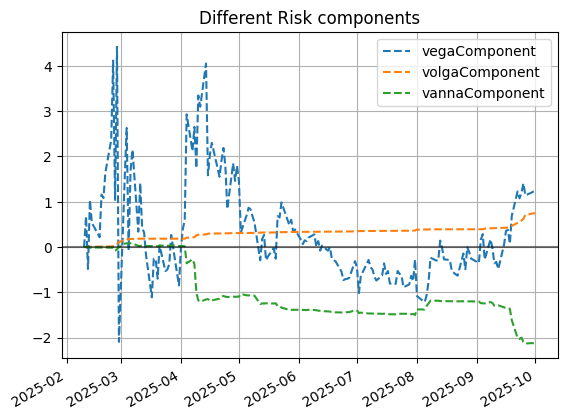

In [ ]:
plt.figure()
plt.plot(res["dates"][:-1], res["vegaComponent"], label="vegaComponent", linestyle='--')
plt.plot(res["dates"][:-1], res["volgaComponent"], label="volgaComponent", linestyle='--')
plt.plot(res["dates"][:-1], res["vannaComponent"], label="vannaComponent", linestyle='--')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
plt.gcf().autofmt_xdate()
plt.title("Different Risk components")
plt.grid(True)
plt.legend()

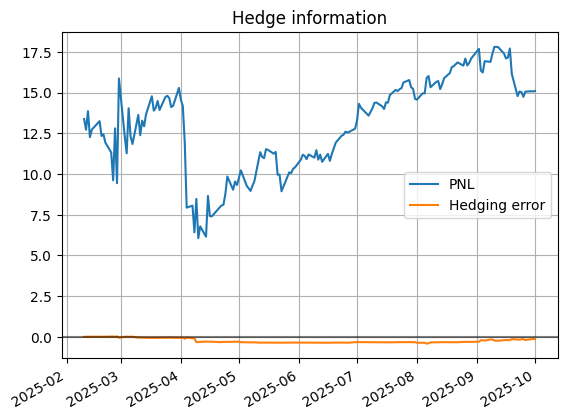

In [ ]:
plt.figure()
plt.plot(res["dates"][:-1], -res["hedgingPortfolioError"], label="PNL")
plt.plot(res["dates"][:-1], res["hedgingPortfolio"], label="Hedging error")
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)

plt.gcf().autofmt_xdate()
plt.title("Hedge information")
plt.grid(True)
plt.legend()

1) Funding component = 0, так как мы берем riskFreeRate = riskFreeRateModel (т.е. мы предполагаем, что реальная ставка равна ставке в модели)\\

2) Premium component > 0 и постоянна, так как мы переоценили стоимость опциона, то есть его справедливая стоимость ниже (стоимость выше, потому что мы взяли волатильность выше, чем реализованная)

3) Delta component меняет знак. Дельта показывает ошибку, возникающую из-за пересчета дельта-хеджа. Дельта нарастает, из чего можно сделать вывод, что ошибка накапливается.

4) Gamma component сначала < 0, затем > 0, и затем снова меняет знак. Она отвечает за ошибку, вызванную разницей реальной воластильности и волатильности, выбранной для хеджирования. В момент скачка наша хедж-стратегия не успела догнать новые рыночные условия, что привело к росту ошибки хеджирования.

5) Vega component, volga component, vanna component не равны 0, так как мы неправильно предсказываем динамику подразумеваемой волатильности. Заметим, что если бы мы взяли постоянную волатильность для опциона, то они были бы нулевыми. \
Если нужно более подробно, то:\
Vega отвечает за изменение стоимости опциона, обусловленное колебаниями уровня волатильности.\
Vanna отвечает за изменение стоимости опциона, вызванное корреляцией между динамикой цены базового актива и изменением волатильности.\
Volga - за изменение стоимости опциона, связанное с нелинейностью зависимости от волатильности (ее дисперсией).

Ну и можно заметить, что Hedging error находится около нуля, то есть видно адекватность результатов



3. Assume we recalibrate the volatility parameter in the model to match the implied volatility obtained from the market for the corresponding sold call option, with these values located in the "impliedVolatility" column of the data table.\
Decompose the hedging error into components. Plot the results.\
Explain sign of each component and factors affecting its size.

In [ ]:
res = decompose_hedging_error(
    dates=dates,
    spotPrice=S,
    volatilityOption=impliedVolatility,
    volatilityPremium=impliedVolatility[0],
    volatilityHedging=impliedVolatility,
    riskFreeRate=rate,
    riskFreeRateModel=rate,
    maturity=expiry,
    strike=strike
)

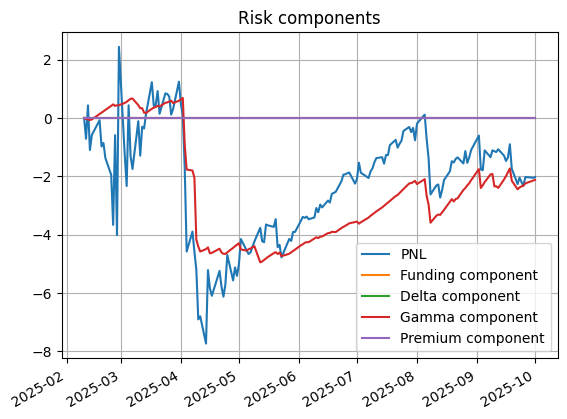

In [ ]:
#графики разбиты на несколько штук для "читабельности"

plt.figure()
plt.plot(res["dates"][:-1], -res["hedgingPortfolioError"], label="PNL")
plt.plot(res["dates"][:-1], res["fundingComponent"], label="Funding component")
plt.plot(res["dates"][:-1], res["deltaComponent"], label="Delta component")
plt.plot(res["dates"][:-1], res["gammaComponent"], label="Gamma component")
plt.plot(res["dates"][:-1], res["premiumComponent"], label="Premium component")
plt.gcf().autofmt_xdate()
plt.title("Risk components")
plt.grid(True)
plt.legend()

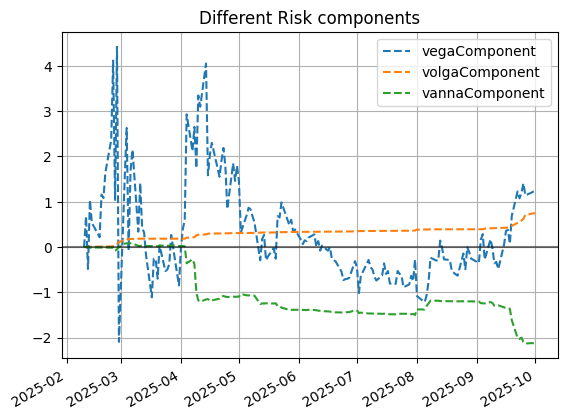

In [ ]:
plt.figure()
plt.plot(res["dates"][:-1], res["vegaComponent"], label="vegaComponent", linestyle='--')
plt.plot(res["dates"][:-1], res["volgaComponent"], label="volgaComponent", linestyle='--')
plt.plot(res["dates"][:-1], res["vannaComponent"], label="vannaComponent", linestyle='--')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
plt.gcf().autofmt_xdate()
plt.title("Different Risk components")
plt.grid(True)
plt.legend()

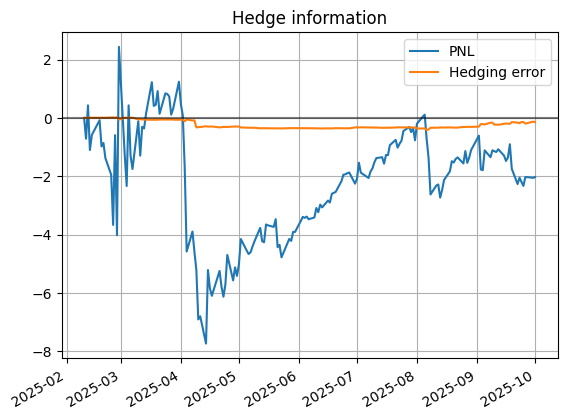

In [ ]:
plt.figure()
plt.plot(res["dates"][:-1], -res["hedgingPortfolioError"], label="PNL")
plt.plot(res["dates"][:-1], res["hedgingPortfolio"], label="Hedging error")
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)

plt.gcf().autofmt_xdate()
plt.title("Hedge information")
plt.grid(True)
plt.legend()

Большинство рассуждения переносятся из предыдущего пункта. Но теперь Delta component = 0, то есть дельта-хедж в точности реплицирует наш опцион. Это соотносится с тем, что взяли как раз implied volatility. \
Но вот итоговые PNL<0, и значит
дельта-хеджа не хватило, чтобы перекрыть рост implied volatility.

4. Assume we recalibrate the volatility parameter in the model using estimates derived from a GARCH(1,1) model calibrated on daily historical stock price, with these values located in the "instantaneousVolatility" column of the data table.\
Decompose the hedging error into components. Plot the results.\
Explain sign of each component and factors affecting its size.

In [ ]:
res = decompose_hedging_error(
    dates=dates,
    spotPrice=S,
    volatilityOption=impliedVolatility,
    volatilityPremium=instantaneousVolatility[0],
    volatilityHedging=instantaneousVolatility,
    riskFreeRate=rate,
    riskFreeRateModel=rate,
    maturity=expiry,
    strike=strike
)

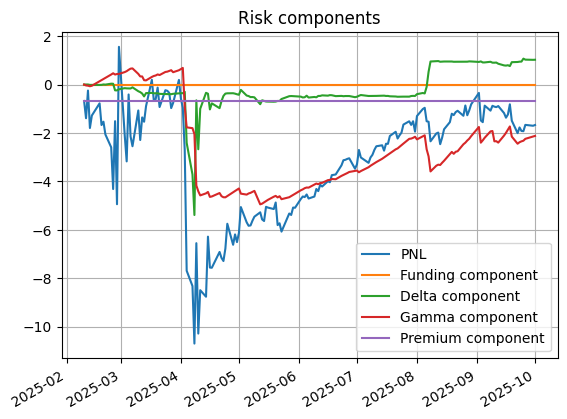

In [ ]:
#графики разбиты на несколько штук для "читабельности"

plt.figure()
plt.plot(res["dates"][:-1], -res["hedgingPortfolioError"], label="PNL")
plt.plot(res["dates"][:-1], res["fundingComponent"], label="Funding component")
plt.plot(res["dates"][:-1], res["deltaComponent"], label="Delta component")
plt.plot(res["dates"][:-1], res["gammaComponent"], label="Gamma component")
plt.plot(res["dates"][:-1], res["premiumComponent"], label="Premium component")
plt.gcf().autofmt_xdate()
plt.title("Risk components")
plt.grid(True)
plt.legend()

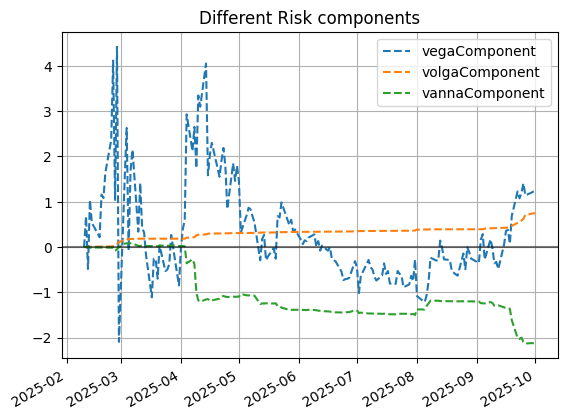

In [ ]:
plt.figure()
plt.plot(res["dates"][:-1], res["vegaComponent"], label="vegaComponent", linestyle='--')
plt.plot(res["dates"][:-1], res["volgaComponent"], label="volgaComponent", linestyle='--')
plt.plot(res["dates"][:-1], res["vannaComponent"], label="vannaComponent", linestyle='--')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
plt.gcf().autofmt_xdate()
plt.title("Different Risk components")
plt.grid(True)
plt.legend()

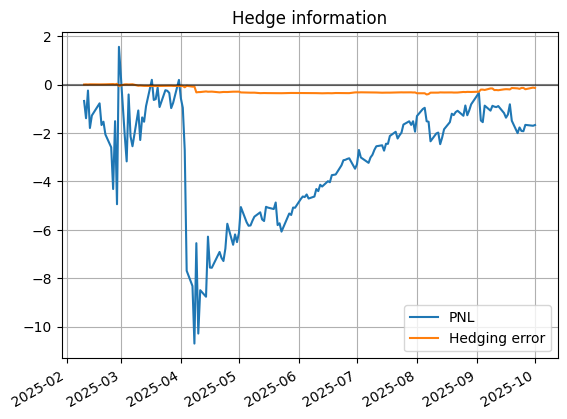

In [ ]:
plt.figure()
plt.plot(res["dates"][:-1], -res["hedgingPortfolioError"], label="PNL")
plt.plot(res["dates"][:-1], res["hedgingPortfolio"], label="Hedging error")
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)

plt.gcf().autofmt_xdate()
plt.title("Hedge information")
plt.grid(True)
plt.legend()

Теперь Delta component снова не равна нулю и Delta component > 0 в конце. То есть мы может и недостаточно часто перекалибровывались, но суммарно в этом получили прибыль.\
Однако набор отрицательной premium component премии (так как начальное значение из GARCH ниже рынка), отрицательной gamma сomponent и vega сomponent (так как implied volatility росла и из-за выпуклости) перевесила положительные эффекты по delta component и vanna component.\
Заметим также, что ошибка хеджирования растёт.